/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/bayuan/anaconda3/envs/wav2vec/lib/python3.9/site-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 23

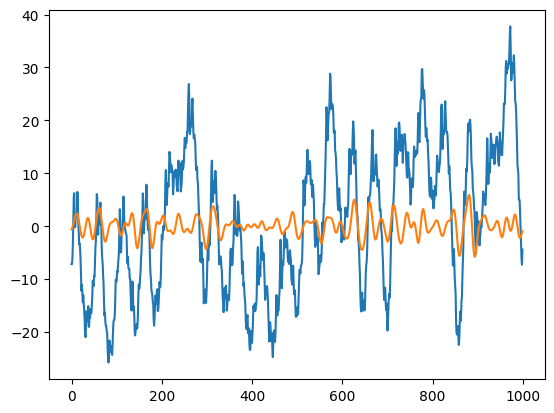

In [54]:
from pynwb import NWBHDF5IO
import numpy as np
import soundfile as sf
import os
import pandas as pd
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import butter, lfilter, filtfilt
from matplotlib import pyplot as plt
# 6 penguisn

path = '/NWB/EFC401/EFC401_B4.nwb'
io = NWBHDF5IO(path, load_namespaces=True, mode='r')
nwbfile = io.read()
nwbfile
# nwbfile.trials[:] # ['transcription'][0]

bad_electrodes = [1,2,63,64,65,127,143,193,194,195,196,235,239,243,252,254,255,256]
bad_electrodes = [x - 1 for x in bad_electrodes]
good_electrodes = np.arange(0,256)
good_electrodes = [x for x in good_electrodes if x not in bad_electrodes]
print(good_electrodes)

sr = nwbfile.acquisition['ElectricalSeries'].\
                              rate

starts = list(nwbfile.trials[:]['start_time'] * sr)
stops = list(nwbfile.trials[:]['stop_time'] * sr)

starts = [int(start) for start in starts]
stops = [int(stop) for stop in stops]

electrode_table = nwbfile.acquisition['ElectricalSeries'].\
                                      electrodes.table[:]

indices = np.where(np.logical_or(electrode_table['group_name'] == 
                                    'L256GridElectrode electrodes', 
                                    electrode_table['group_name'] == 
                                    'R256GridElectrode electrodes'))[0]

nwbfile_electrodes = nwbfile.acquisition['ElectricalSeries'].\
                                data[:,indices]
                                
print(nwbfile_electrodes.shape)

w_l = 70 / (sr / 2) # Normalize the frequency
w_h = 199 / (sr / 2)
b, a = butter(5, [w_l,w_h], 'band')

nwbfile_electrodes = nwbfile_electrodes[:,good_electrodes] * 1000000
print(nwbfile_electrodes[starts[0]:starts[0] + 5, 0])
plt.plot(nwbfile_electrodes[starts[0]:starts[0] + 1000, 0])
original = nwbfile_electrodes

print(nwbfile_electrodes.shape)
print(nwbfile_electrodes[:,0].shape)

for ch in range(nwbfile_electrodes.shape[1]):
    signal = nwbfile_electrodes[:, ch]
    nwbfile_electrodes[:,ch] = filtfilt(b, 
                                        a, 
                                        signal)
    
plt.plot(nwbfile_electrodes[starts[0]:starts[0] + 1000,0])
# print(nwbfile_electrodes.shape)
# print(starts[0], stops[0])
# print(nwbfile_electrodes[starts[0]:stops[0],:])

[-0.60491861 -0.46167651 -0.24612877  0.03915344  0.38338887]


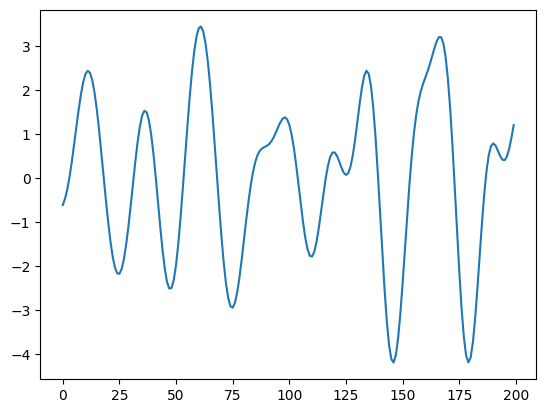

In [51]:
from matplotlib import pyplot as plt
print(nwbfile_electrodes[starts[0]:starts[0] + 5,0])

plt.plot(nwbfile_electrodes[starts[0]:starts[0] + 200,0])

[-0.60491861 -0.46167651 -0.24612877  0.03915344  0.38338887]


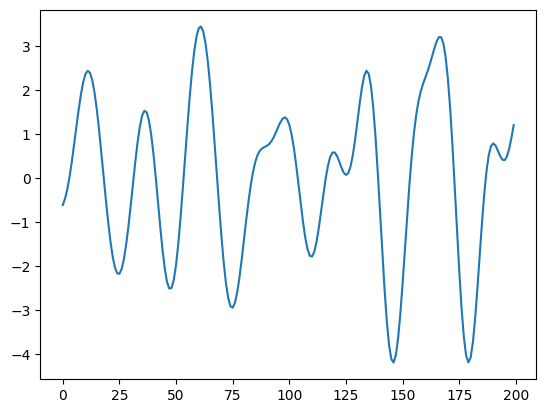

In [40]:
from matplotlib import pyplot as plt
print(original[starts[0]:starts[0] + 5,0])

plt.plot(original[starts[0]:starts[0] + 200,0])

In [14]:
import soundfile as sf

aud_path = '/home/bayuan/Documents/fall23/ecog2vec/wav2vec_inputs/raw_hg_sentences/EFC401_B4.nwb_0.wav'

wav, _ = sf.read(aud_path, dtype="float32")

wav

array([[-6.0491845e-07, -2.9985441e-07, -3.3442788e-07, ...,
         4.7069082e-07,  1.7584454e-06,  1.4776917e-06],
       [-4.6167636e-07,  5.5176077e-09, -2.0966564e-07, ...,
         3.6829928e-07,  2.4228273e-06,  1.6440607e-06],
       [-2.4612865e-07,  2.8004604e-07, -8.8243581e-08, ...,
         2.3465518e-07,  2.8879047e-06,  1.7282358e-06],
       ...,
       [-5.6661042e-07, -5.8601555e-09,  7.3062188e-07, ...,
        -6.0248354e-08, -2.0138409e-06,  6.8579527e-07],
       [-4.0485796e-07,  3.1970851e-07,  6.9699706e-07, ...,
        -1.4033348e-07, -2.1634016e-06,  6.1392694e-07],
       [-2.2146929e-07,  6.7107732e-07,  6.5749128e-07, ...,
        -2.0899905e-07, -2.1956673e-06,  5.1792404e-07]], dtype=float32)

In [18]:
x = np.arange(0, 100)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [19]:
starts = [0, 10, 20, 30, 40]
stops = [5, 15, 25, 35, 45]
x[starts:stops]

TypeError: slice indices must be integers or None or have an __index__ method